In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [ ]:
# Import cleaned data
df = pd.read_csv('')
df.head()

,Deterioration_Rate_Moving_Avg,RDWYID,RDWY,BMP,EMP,CONTYDOT,LANES,LEN,LM,DISTRICT,...,TYPEt+28,TYPEt+29,TYPEt+30,TYPEt+31,TYPEt+32,TYPEt+33,TYPEt+34,TYPEt+35,TYPEt+36,TYPEt+37
0,0.176471,1010000,C,13.274,13.469,1,2,0.195,0.390,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.235294,1010000,C,13.469,14.160,1,2,0.691,1.382,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.158333,1010000,L,1.150,4.983,1,2,3.833,7.666,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.375000,1010000,L,4.983,5.382,1,2,0.399,0.798,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.297619,1010000,L,5.382,7.777,1,2,2.395,4.790,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# List of columns for precipitation
precipitation_columns = [f'PRECt+{i}' for i in range(38)]

# List of columns for average temperature
avg_temp_columns = [f'AVGTEMt+{i}' for i in range(38)]

In [ ]:
# Calculate average precipitation and average temperature
df['AVG_PREC'] = df[precipitation_columns].mean(axis=1)
df['AVG_TEMP'] = df[avg_temp_columns].mean(axis=1)

In [ ]:


# Drop the original precipitation and average temperature columns
df_cleaned = df.drop(columns=precipitation_columns + avg_temp_columns)

# Update the list of columns to keep in the forward regression
columns_to_keep = [
    'Deterioration_Rate_Moving_Avg',
    'ESALS',
    'MAXSPEED',
    'AVG_PREC',  # Include the new average precipitation column
    'AVG_TEMP',  # Include the new average temperature column
    'SURFTYPE',
    'CYCLE',
]



In [ ]:
# Assuming df is your DataFrame
df_cleaned = df[columns_to_keep].copy()

# Fill missing values with the mean of each column
df_cleaned.fillna(df_cleaned.mean(), inplace=True)

# Alternatively, you can fill missing values with a specific constant, for example, 0
# df_cleaned.fillna(0, inplace=True)


<ipython-input-7-edf277718119>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned.fillna(df_cleaned.mean(), inplace=True)


In [ ]:
# Assuming df_cleaned is your DataFrame with missing values handled
df_encoded = pd.get_dummies(df_cleaned, columns=['SURFTYPE', 'CYCLE'], drop_first=True)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df_encoded is your DataFrame with one-hot encoding

# Define the target variable
target_variable = 'Deterioration_Rate_Moving_Avg'

# Define the feature columns
feature_columns = df_encoded.columns[df_encoded.columns != target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded[feature_columns], df_encoded[target_variable], test_size=0.2, random_state=42)

# Initialize an empty list to store selected features
selected_features = []

# Initialize an empty list to store model performance metrics
mse_values = []

# Create a linear regression model
model = LinearRegression()

# Forward regression loop
for _ in range(len(feature_columns)):
    best_feature = None
    min_mse = float('inf')

    for feature in feature_columns:
        if feature not in selected_features:
            # Include the feature in the current model
            current_features = selected_features + [feature]
            X_train_current = X_train[current_features]
            X_test_current = X_test[current_features]

            # Fit the model and make predictions
            model.fit(X_train_current, y_train)
            y_pred = model.predict(X_test_current)

            # Calculate Mean Squared Error
            mse = mean_squared_error(y_test, y_pred)

            # Update the best feature if it improves the model
            if mse < min_mse:
                min_mse = mse
                best_feature = feature

    # Add the best feature to the selected features list
    selected_features.append(best_feature)

    # Add the MSE value to the list
    mse_values.append(min_mse)

# Print the selected features and their corresponding MSE values
for feature, mse in zip(selected_features, mse_values):
    print(f"Feature: {feature}, MSE: {mse}")


In [ ]:

# Assuming df_cleaned contains the selected features and target variable
# Replace 'selected_features' with the features you've chosen based on MSE values

selected_features = ['SURFTYPE_FC5M', 'AVG_TEMP', 'SURFTYPE_FC5', 'SURFTYPE_FC125AR', 'SURFTYPE_FC3', 'SURFTYPE_DGFC']

X = df_encoded[selected_features]
y = df_encoded['Deterioration_Rate_Moving_Avg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Optionally, you can print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 0.01565956284269012
R-squared: 0.10949375009205509
Coefficients: [ 0.09272127 -0.00828978  0.08055744  0.08267448 -0.04595932 -0.02989337]
Intercept: 0.8219713299068672


In [ ]:

# Assuming df_encoded is your original DataFrame
# Extract the columns that represent the features used in the model
features_used = ['SURFTYPE_FC5M', 'AVG_TEMP', 'SURFTYPE_FC5', 'SURFTYPE_FC125AR', 'SURFTYPE_FC3', 'SURFTYPE_DGFC']

# Create a new DataFrame for future years, you might need to adjust the range based on your actual data
future_years_df = pd.DataFrame(index=range(df_encoded.index.min(), df_encoded.index.max() + 5))  # +6 for t+0 to t+5

# Add the feature columns to the new DataFrame
for feature in features_used:
    future_years_df[feature] = df_encoded[feature]

# Optionally, you might need to adjust the feature values based on your forecasting assumptions
# For example, if you assume the same surface type for the next 5 years, set the future values accordingly

# Display the new DataFrame
print(future_years_df.head())




   SURFTYPE_FC5M   AVG_TEMP  SURFTYPE_FC5  SURFTYPE_FC125AR  SURFTYPE_FC3  \
0            0.0  74.641000           0.0               0.0           0.0   
1            0.0  74.641000           0.0               0.0           0.0   
2            0.0  75.787143           0.0               0.0           0.0   
3            0.0  75.787143           0.0               0.0           0.0   
4            0.0  74.849412           1.0               0.0           0.0   

   SURFTYPE_DGFC  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  


In [ ]:
print(X.isnull().sum())



SURFTYPE_FC5M       0
AVG_TEMP            0
SURFTYPE_FC5        0
SURFTYPE_FC125AR    0
SURFTYPE_FC3        0
SURFTYPE_DGFC       0
dtype: int64


In [ ]:
# Assuming you already have a trained model
model = LinearRegression()

# Assuming y_train is your target variable
model.fit(X_train, y_train)

# Use the feature matrix for predictions
future_years_predictions = model.predict(X)

# Add the predictions to the DataFrame
df_encoded['Predicted_Deterioration_Rate'] = future_years_predictions

# Display the DataFrame with predictions
print(df_encoded.head())


Mean Squared Error: 0.016523846925875343


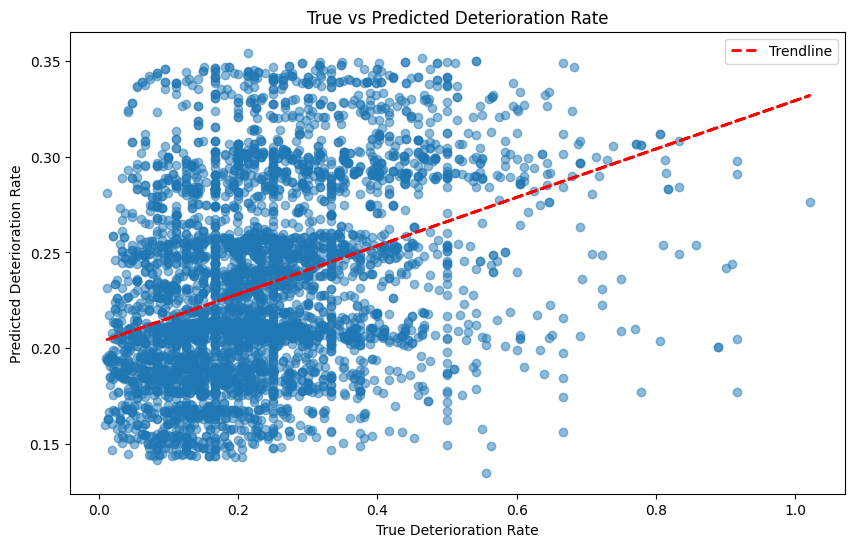

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have df_encoded with 'Deterioration_Rate_Moving_Avg' and 'Predicted_Deterioration_Rate' columns
y_true = df_encoded['Deterioration_Rate_Moving_Avg']
y_pred = df_encoded['Predicted_Deterioration_Rate']

# Calculate Mean Squared Error
mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error: {mse}')

# Assuming y_true and y_pred are your true and predicted values
# Scatter plot for true vs predicted deterioration rate
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)

# Fit a linear regression line
fit = np.polyfit(y_true, y_pred, deg=1)
plt.plot(y_true, fit[0] * y_true + fit[1], color='red', linestyle='--', linewidth=2, label='Trendline')

plt.title('True vs Predicted Deterioration Rate')
plt.xlabel('True Deterioration Rate')
plt.ylabel('Predicted Deterioration Rate')
plt.legend()
plt.show()

